# Scraping notebook
From this notebook you can manually run the news articles scraping process and have some monitoring graphs

In [1]:
%reload_ext autoreload
%autoreload 2

In [116]:
from datetime import datetime, timedelta

from elections import constants
from elections.scrapers.news_scraper import NewsScraper

In [117]:
SCRAPE_START_DATE = datetime.now() - timedelta(7) #constants.PM_RESIGNATION_DATE
SCRAPE_END_DATE = datetime.now()

print(f"Scraping news articles from {SCRAPE_START_DATE} to {SCRAPE_END_DATE}")

Scraping news articles from 2024-02-25 12:44:21.952725 to 2024-03-03 12:44:21.952762


In [118]:
for politician in constants.POLITICIANS:
    news_finder = NewsScraper(politician, constants.PM_RESIGNATION_DATE, datetime.now())
    news_finder.get_metadata()
    news_finder.get_article()
    news_finder.save_articles()

2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nuno Santos
2024/03/03 12:45:08 - elections.scrapers.news_scraper - INFO: Getting metadata for Pedro Nu

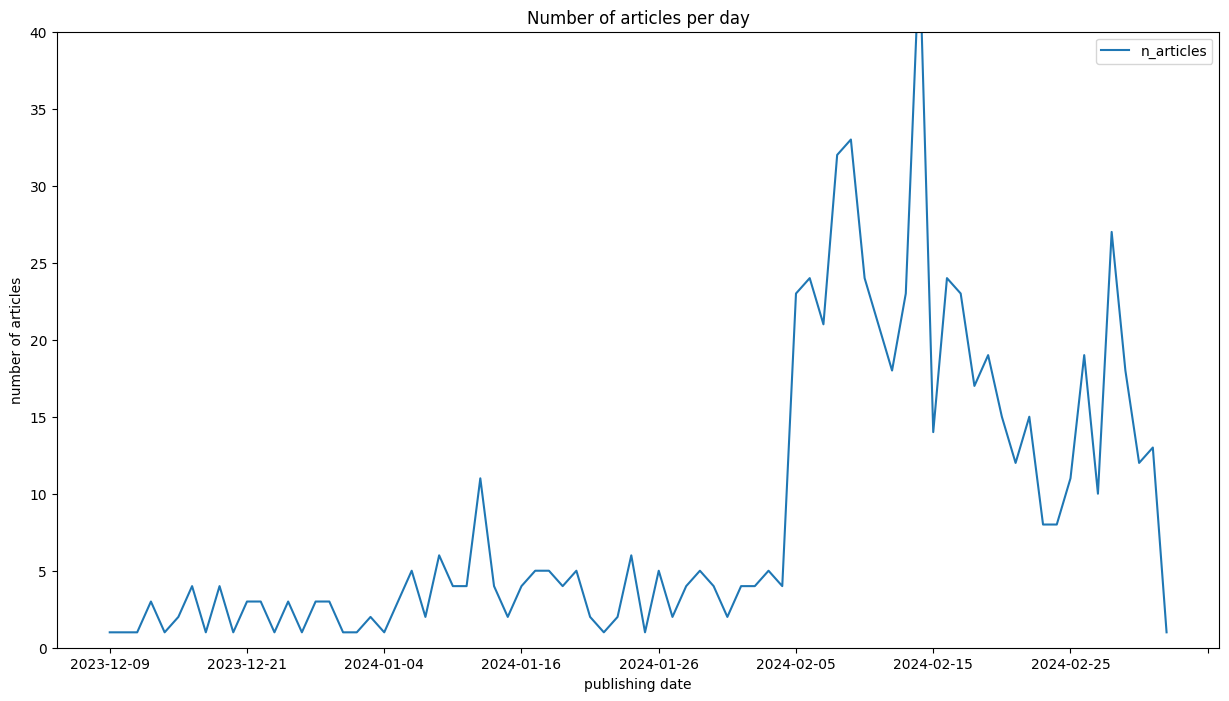

In [119]:
NewsScraper.plot_daily_article_counts()

n_pedro_nuno_santos     240
n_luis_montenegro       219
n_andre_ventura         187
n_rui_rocha             118
n_mariana_mortagua      139
n_paulo_raimundo        115
n_ines_de_sousa_real     55
n_rui_tavares           127
dtype: int64


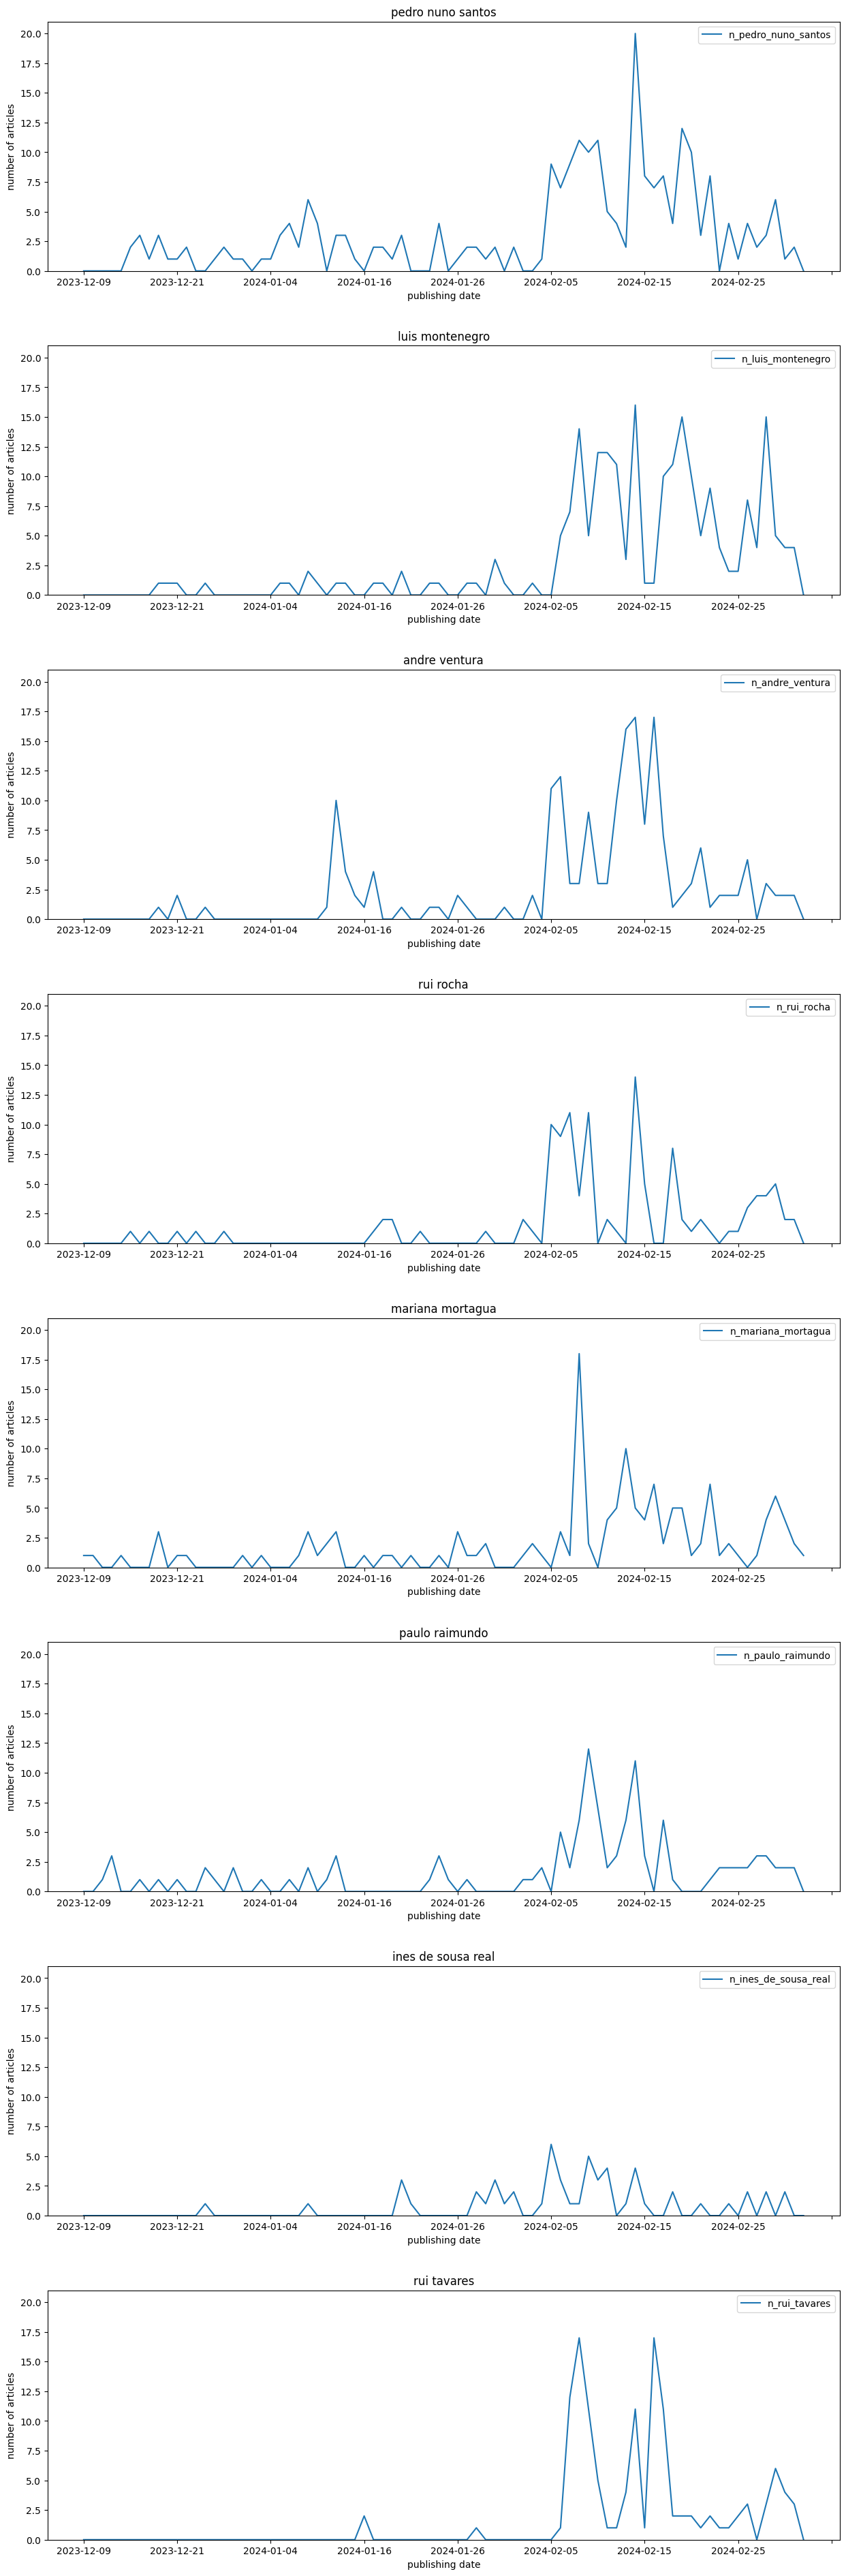

In [120]:
NewsScraper.plot_daily_politician_ref_counts()